In [1]:
def plot_settings(style='seaborn-whitegrid'):
    """
    Common rcParams for plot styling
    """
    import matplotlib as mpl
    
    mpl.style.use(style)
    mpl.rcParams['font.weight']= 'bold'
    mpl.rcParams['font.size']= 16

In [2]:
import pandas as pd
%matplotlib inline
             
data = pd.read_feather("../data/aeolus_top5drugs.feather")

In [3]:
def freqXbyY(data,x = 'drug_concept_id',y = 'report_year'):
    """
    helper groupby x and count y method
    """
    
    return data.groupby(x)[y].count()

In [6]:
grpd = freqXbyY(data,'drug_concept_id','id')

In [7]:
import ipywidgets as w

In [34]:
drugs = grpd.index.values
d = w.Dropdown(options = drugs,layout=w.Layout(width='30%', display='flex'))

In [35]:
d

Dropdown(layout=Layout(display='flex', width='30%'), options=(923645, 956874, 1112807, 1125315, 1501700), valu…

In [20]:
def filtXfreqYbyZ(data,label,x,y,z):
    """
    filter by the label in x within the dataframe
    
    use freqXbyY helper method
    """
    
    tmp = data.query('{0}==@label'.format(x))
    
    return freqXbyY(tmp,y,z)

In [21]:
ac_grpd = filtXfreqYbyZ(data,label=d.label,x='drug_concept_id',y='age_cat',z='age_cat')

In [22]:
plot_settings()

In [36]:
def plot(series,kind):
    """
    helper for plotting
    """
    
    series.plot(kind=kind)

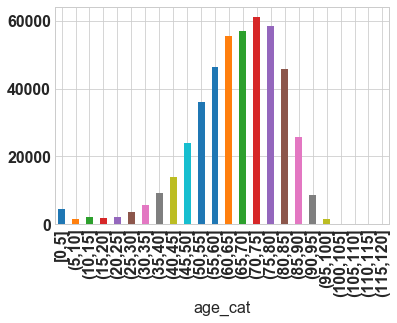

In [38]:
plot(ac_grpd,'bar')